# Assignment 14 - Threshold

1. Apply the following threshold method to image ca[.ext]
- Binary
- Binary Inverse 
- Truncate
- Tozero
- Tozero Inverse

2. Apply the two adaptive threshold method to image ca[.ext]
3. Apply the bilateralFilter before applying the two adaptive threshold method to image ca[.ext] 

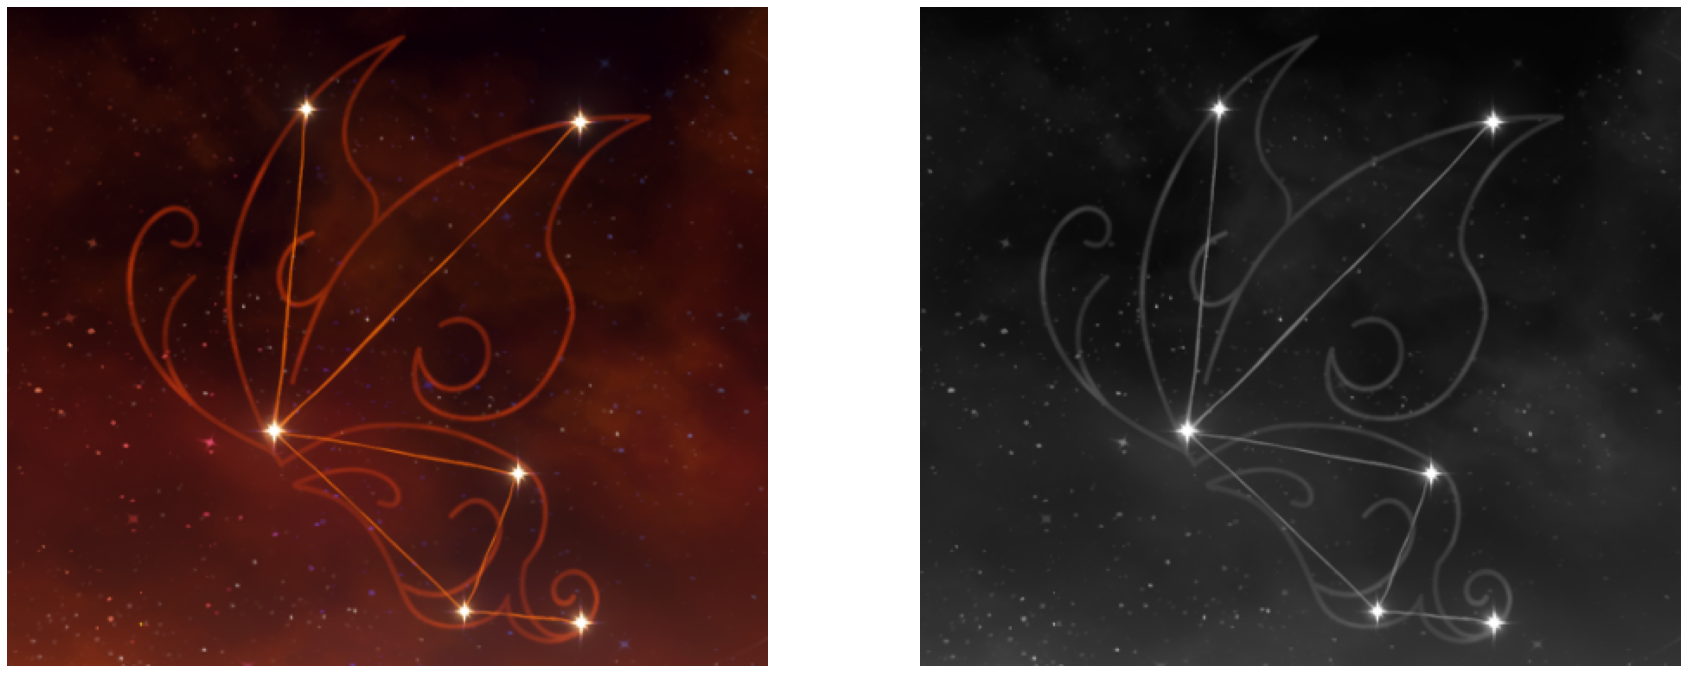

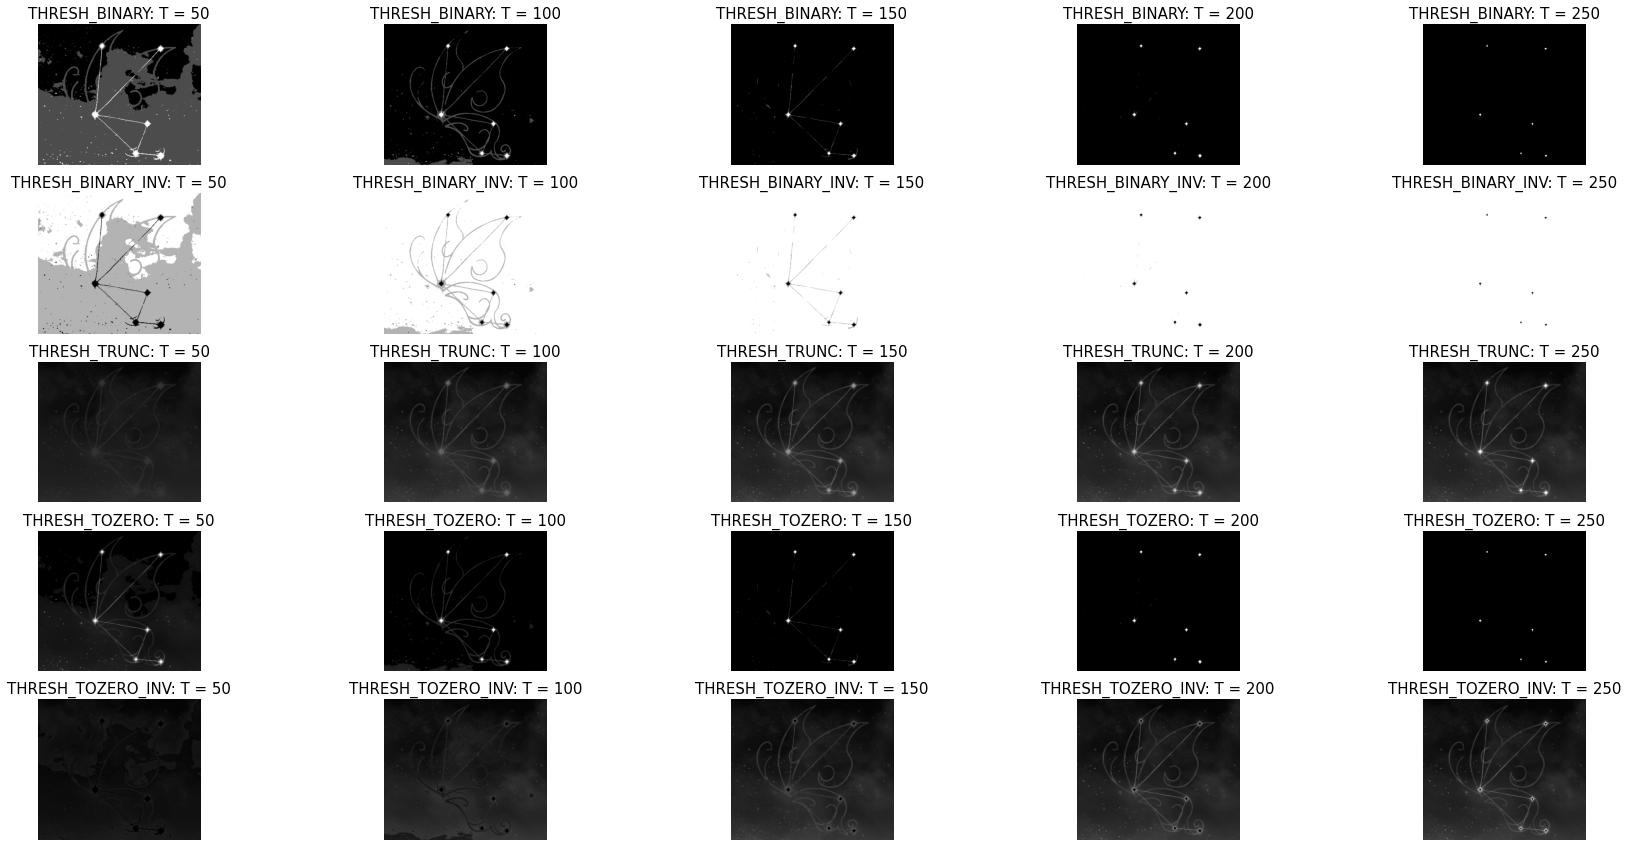

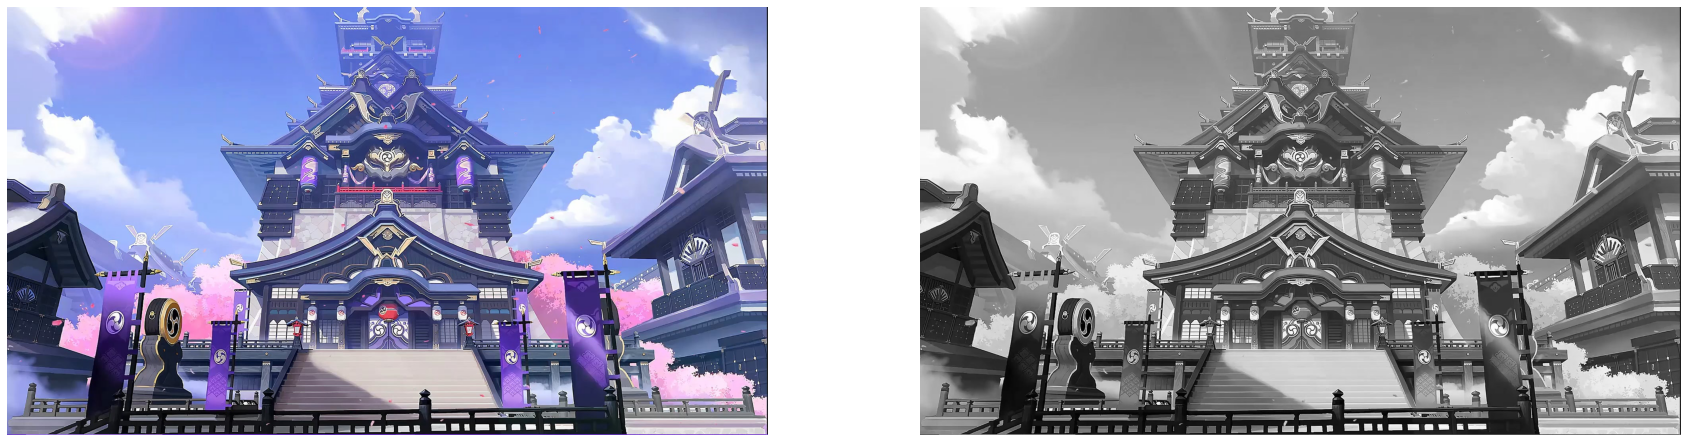

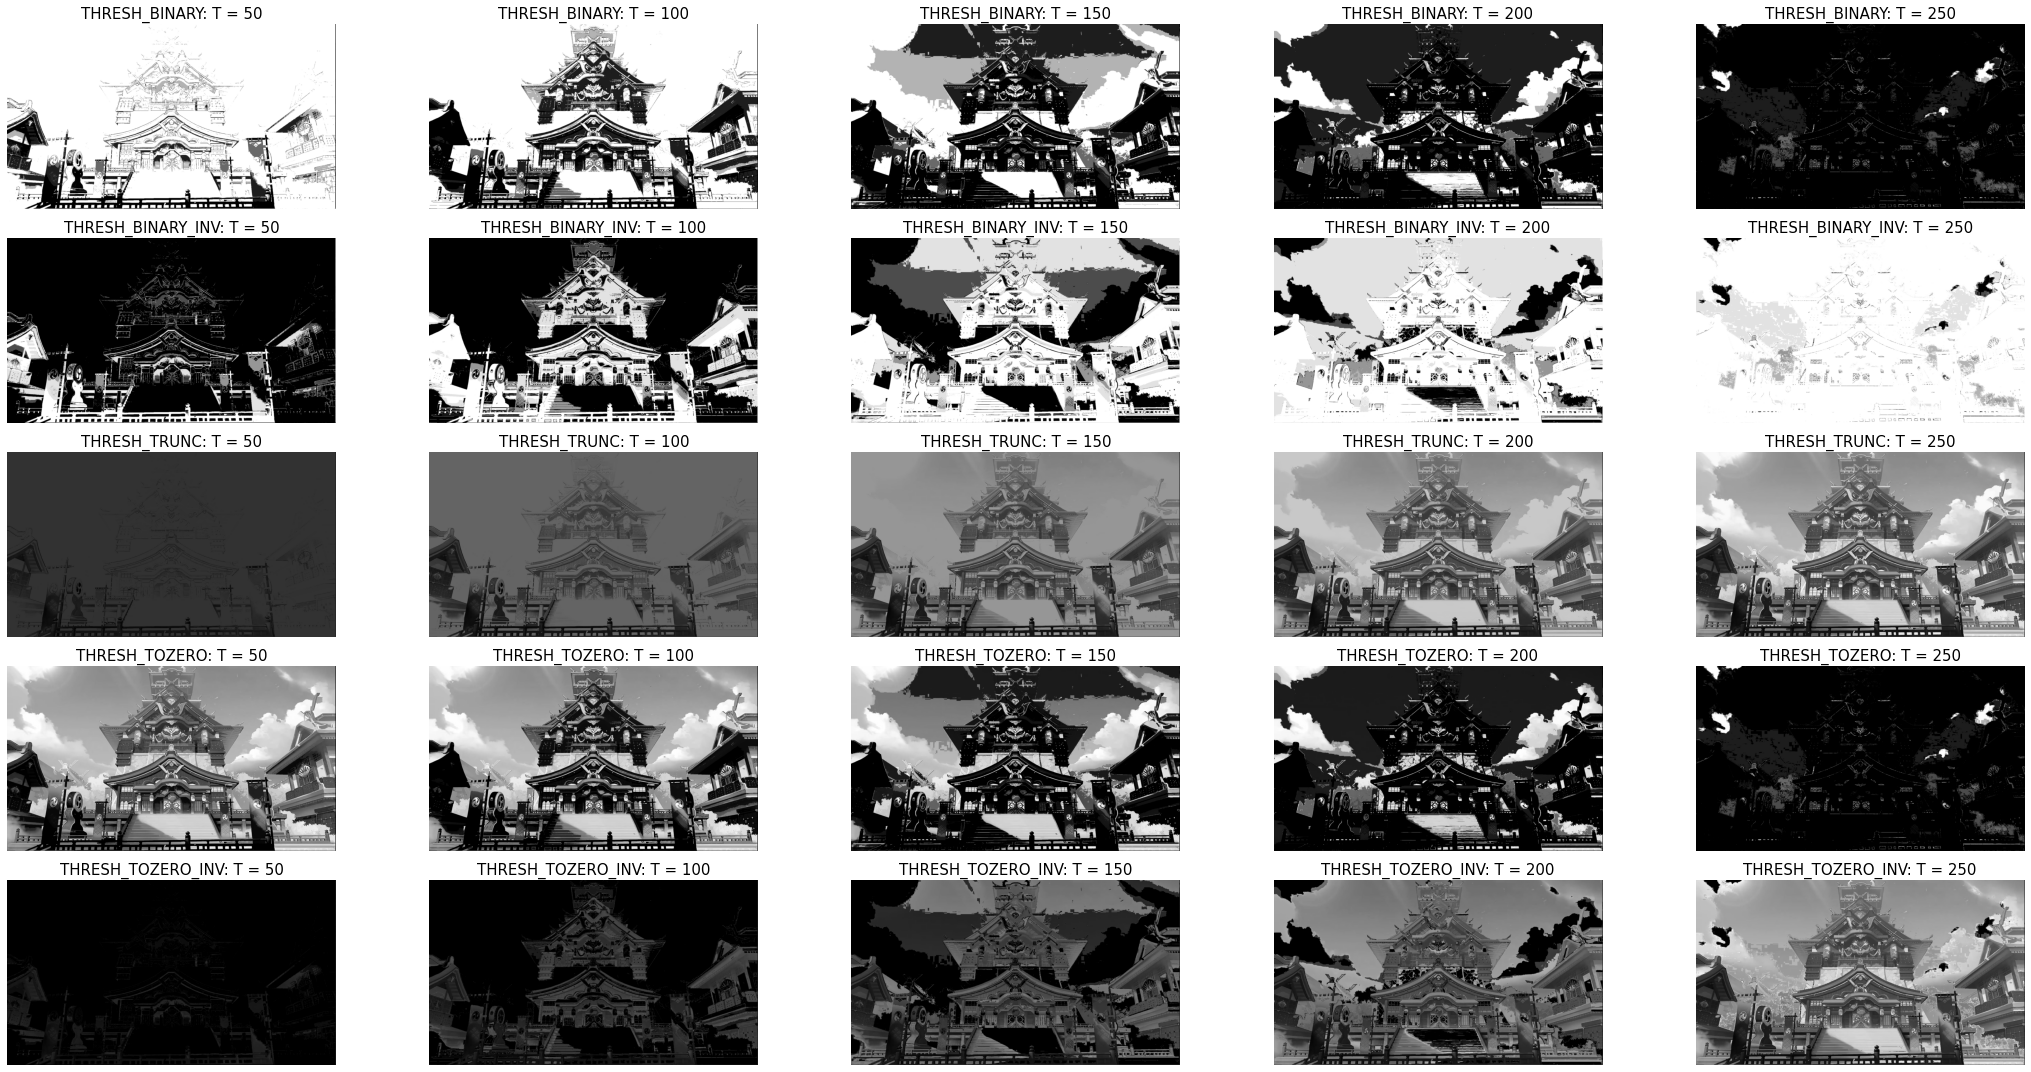

In [1]:
# 1. Apply the following threshold method to image ca[.ext]
# - Binary
# - Binary Inverse
# - Truncate
# - Tozero
# - Tozero Inverse

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


# Funtion to ease color conversion
def modeRGB(img):
    return img[:, :, ::-1]


def modeRGBGray(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img


# Set path
path1 = r"../essential/assets/ca2.png"
path2 = r"../essential/assets/ca.png"
path_ls = [path1, path2]

for x in range(len(path_ls)):
    
    # Read the image & convert
    img = cv.imread(path_ls[x])
    imgRGB = modeRGB(img)
    imgRGB_gray = modeRGBGray(img)

    # Plot the original
    plt.figure(figsize=(30, 15))
    plt.subplot(1, 2, 1)
    plt.imshow(imgRGB)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(imgRGB_gray)
    plt.axis("off")

    # Initialize variables
    title = []
    img_ls = []
    t_val = [50, 100, 150, 200, 250]
    maxval = 255

    t_types = [
        cv.THRESH_BINARY,
        cv.THRESH_BINARY_INV,
        cv.THRESH_TRUNC,
        cv.THRESH_TOZERO,
        cv.THRESH_TOZERO_INV,
    ]

    type_title = [
        "THRESH_BINARY",
        "THRESH_BINARY_INV",
        "THRESH_TRUNC",
        "THRESH_TOZERO",
        "THRESH_TOZERO_INV",
    ]

    row = len(t_types)
    col = len(t_val)

    # APPLY THRESHOLDING
    for i in range(row):
        for j in range(col):
            ret, img_thresh = cv.threshold(img, t_val[j], maxval, t_types[i])
            img_gray_thresh = modeRGBGray(img_thresh)
            img_ls.append(img_gray_thresh)
            title.append(f"{type_title[i]}: T = {t_val[j]}")

            
    # Plot the images
    plt.figure(figsize=(30, 15))
    for k in range(len(img_ls)):
        plt.subplot(row, col, k + 1)
        plt.imshow(img_ls[k])
        plt.axis("off")
        plt.title(title[k], fontsize=15)
        
plt.tight_layout()
plt.show()

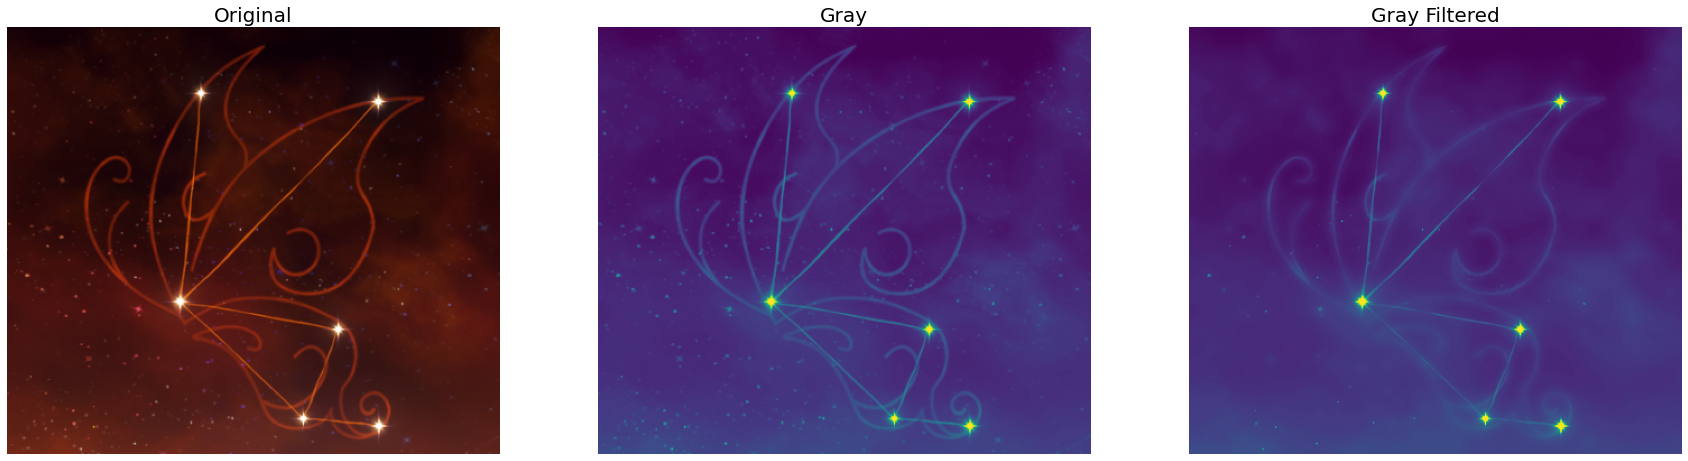

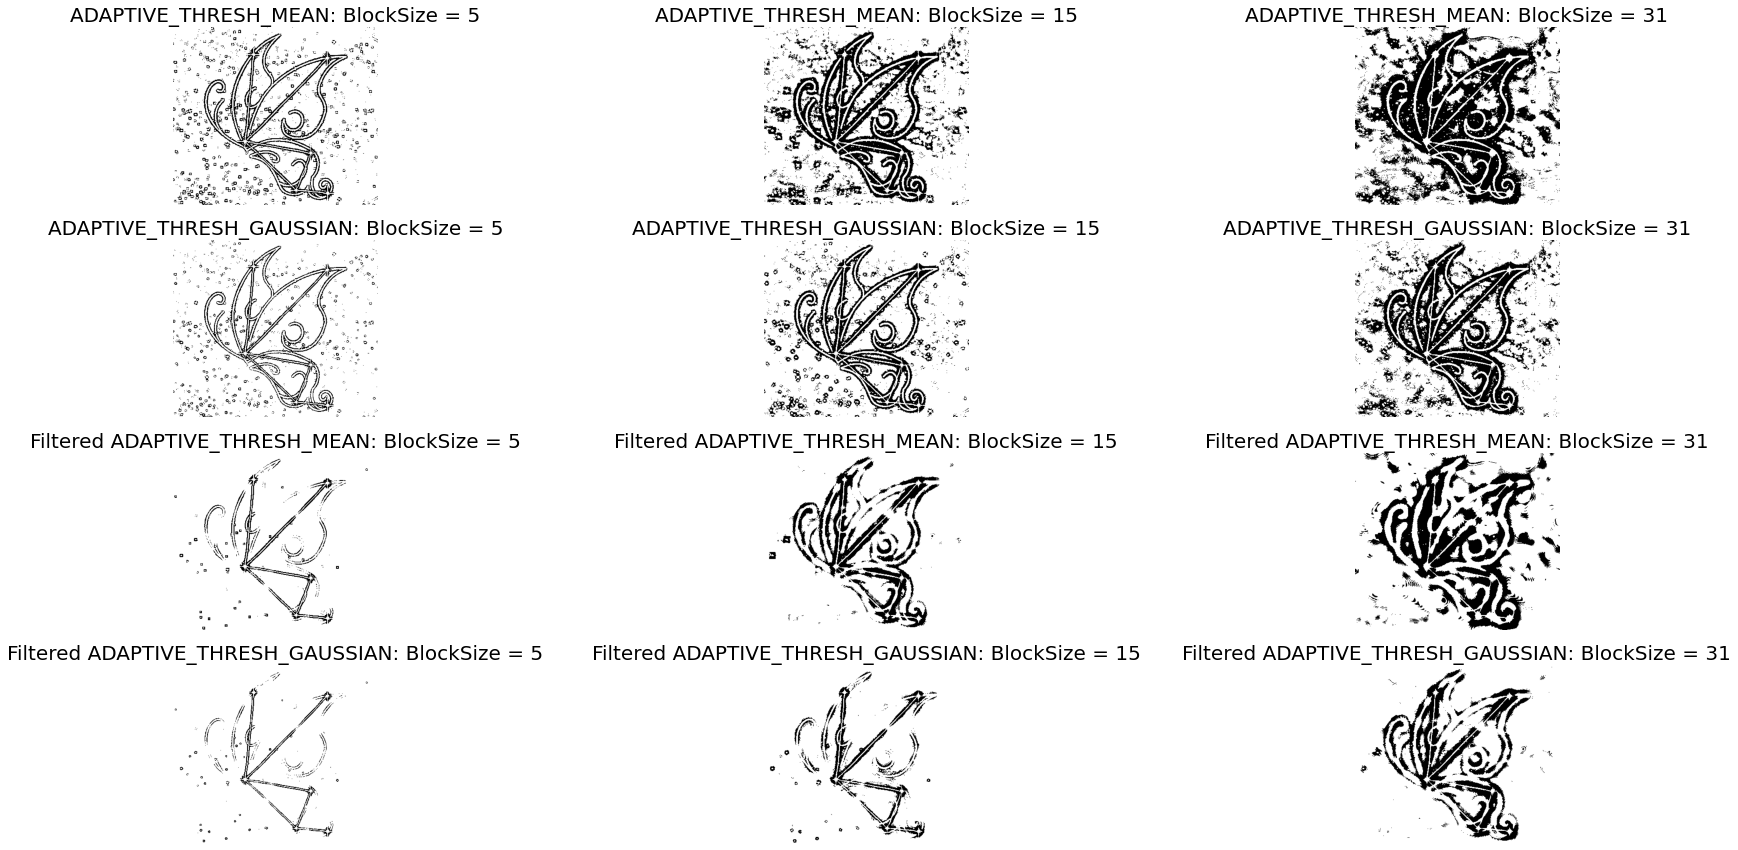

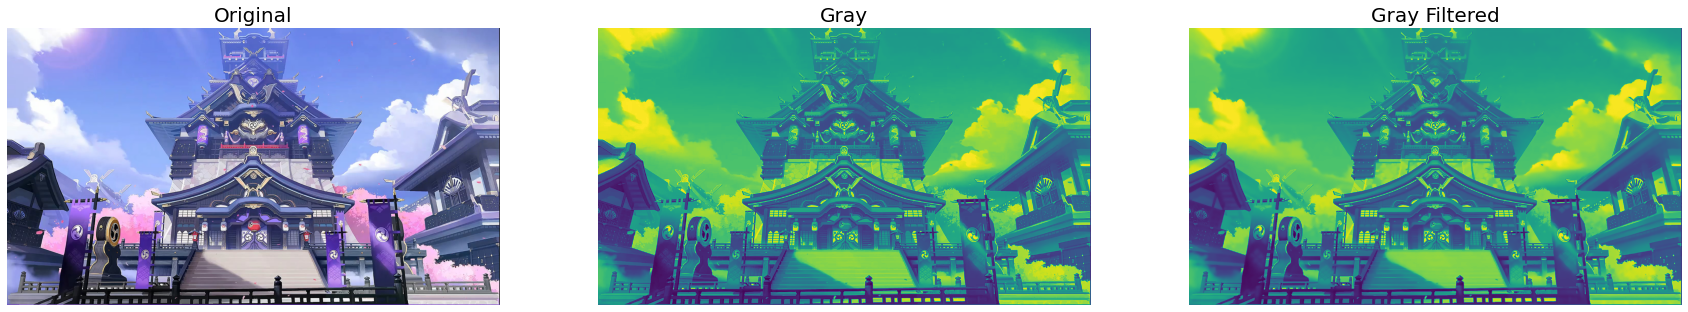

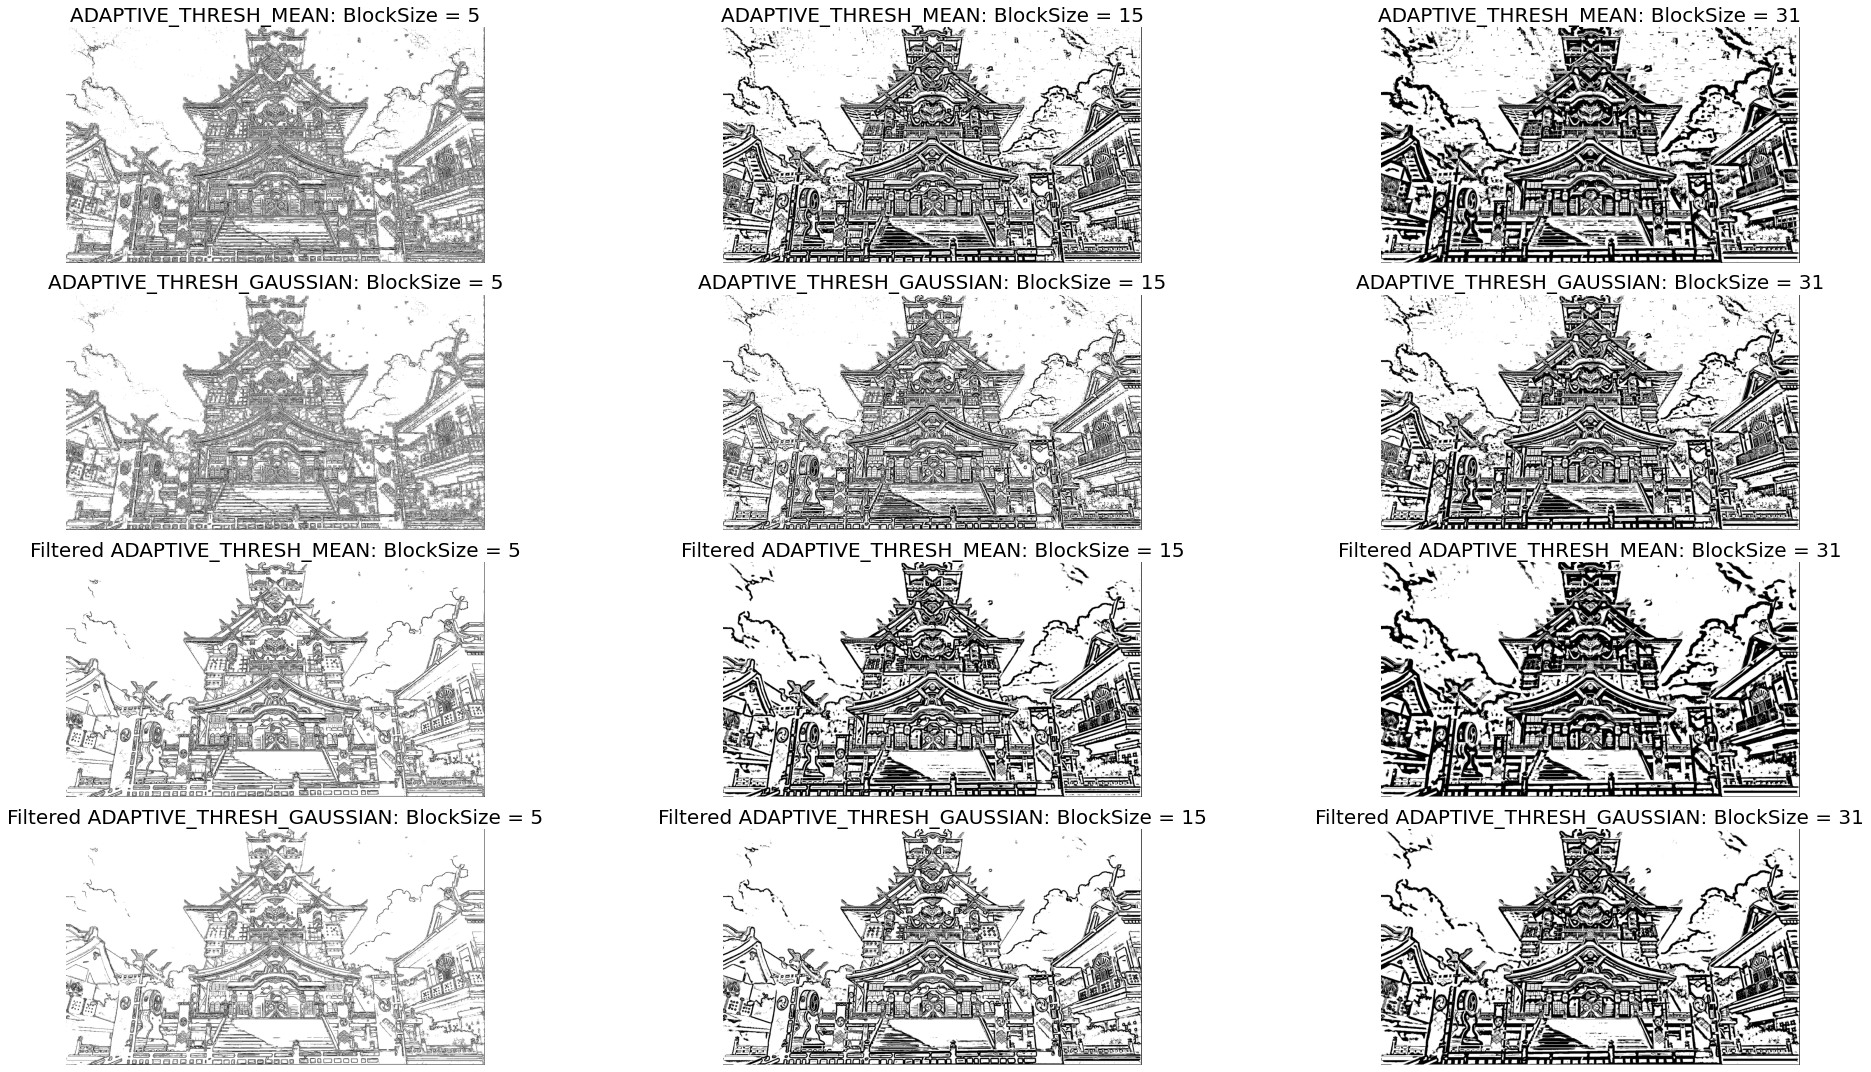

In [2]:
# 2. Apply the two adaptive threshold method to image ca[.ext]
# 3. Apply the bilateralFilter before applying the two adaptive threshold method to image ca[.ext]

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Function to ease color conversion
def modeRGB(img):
    return img[:, :, ::-1]


def modeRGBGray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)


# Set path
path1 = r"../essential/assets/ca2.png"
path2 = r"../essential/assets/ca.png"
path_ls = [path1, path2]

for x in range(len(path_ls)):
    
    # Read the image and convert
    img = cv.imread(path_ls[x])
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_gray_filtered = cv.bilateralFilter(img_gray, 15, 25, 25)

    imgRGB = modeRGB(img)
    imgRGB_gray = modeRGBGray(img)
    fsize = 20

    # Plot the orifinal, gray, and filtered
    plt.figure(figsize=(30, 15))
    plt.subplot(1, 3, 1)
    plt.imshow(imgRGB)
    plt.axis("off")
    plt.title("Original", fontsize=fsize)

    plt.subplot(1, 3, 2)
    plt.imshow(img_gray)
    plt.axis("off")
    plt.title("Gray", fontsize=fsize)

    plt.subplot(1, 3, 3)
    plt.imshow(img_gray_filtered)
    plt.axis("off")
    plt.title("Gray Filtered", fontsize=fsize)

    
    # Initialize variables
    title = []
    img_ls = []
    block_size = [5, 15, 31]
    C = 2
    maxval = 255

    t_types = [cv.ADAPTIVE_THRESH_MEAN_C, cv.ADAPTIVE_THRESH_GAUSSIAN_C]
    type_title = ["ADAPTIVE_THRESH_MEAN", "ADAPTIVE_THRESH_GAUSSIAN"]
    img_type = [img_gray, img_gray_filtered]

    row = len(t_types)
    col = len(block_size)
    plt.figure(figsize=(30, 15))

    # APPLY THRESHOLDING FOR BOTH WITH AND WHITOUT FILTERING
    for x in range(len(img_type)):
        for i in range(row):
            for j in range(col):
                img_thresh = cv.adaptiveThreshold(
                    img_type[x],
                    maxval,
                    t_types[i],
                    cv.THRESH_BINARY,
                    blockSize=block_size[j],
                    C=C,
                )
                img_thresh = cv.cvtColor(img_thresh, cv.COLOR_GRAY2RGB)

                img_ls.append(img_thresh)

                if x == 0:
                    title.append(f"{type_title[i]}: BlockSize = {block_size[j]}")
                else:
                    title.append(
                        f"Filtered {type_title[i]}: BlockSize = {block_size[j]}"
                    )

    # Plot the images
    for k in range(len(img_ls)):
        plt.subplot(4, 3, k + 1)
        plt.imshow(img_ls[k])
        plt.axis("off")
        plt.title(title[k], fontsize=fsize)

plt.tight_layout()
plt.show()